<a href="https://colab.research.google.com/github/bhargav-borah/GoldPriceEstimator-RandomForest/blob/main/gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gold Price Prediction

## Importing the dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

## Importing the dataset

In [7]:
gold_dataset = pd.read_csv('gld_price_data.csv')

## Exploring the data

In [8]:
gold_dataset.shape

(2290, 6)

In [9]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [11]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [14]:
gold_dataset.duplicated().sum()

0

In [15]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [16]:
corr_matrix = gold_dataset.corr()

<ipython-input-16-55d5dc0bb906>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = gold_dataset.corr()


<Axes: >

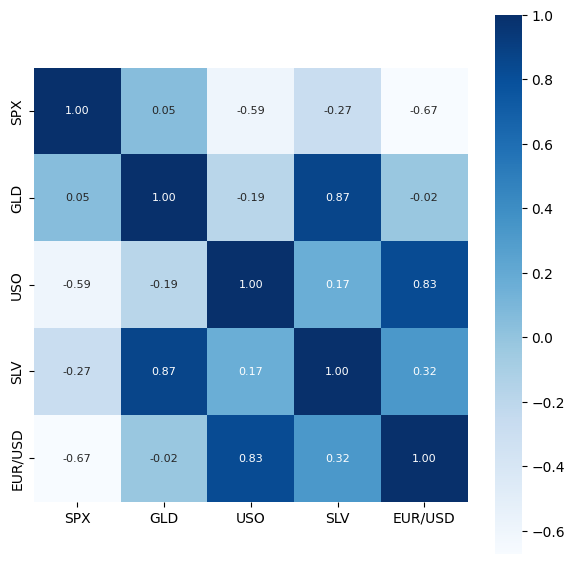

In [19]:
plt.figure(figsize=(7, 7))
sns.heatmap(corr_matrix, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [21]:
# Correlation values of gold
corr_matrix['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<ipython-input-27-5f16230ab302>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'], color='blue')


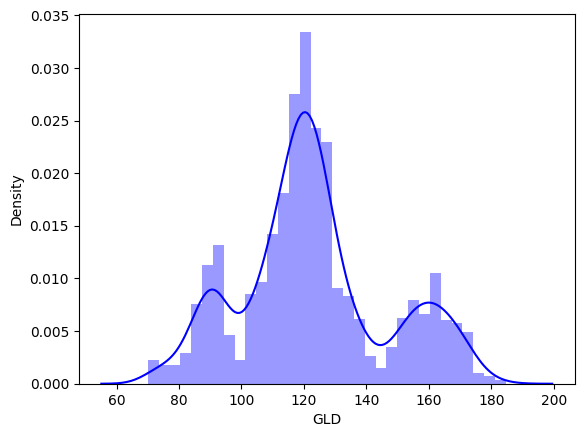

In [27]:
# Checking distribution of the GLD price
sns.distplot(gold_dataset['GLD'], color='blue')
plt.show()

## Separating the features and the labels

In [28]:
X = gold_dataset.drop(columns=['Date', 'GLD'])
y = gold_dataset['GLD']

## Splitting the data into training set and test set

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Training the model

In [31]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, y_train)

RandomForestRegressor()

## Model Evaluation

### Evaluation on the training set

In [32]:
y_pred_train = regressor.predict(X_train)
print('R-squared error = ', r2_score(y_train, y_pred_train))

R-squared error =  0.9984767735858574


### Evaluation on the test set

In [33]:
y_pred_test = regressor.predict(X_test)
print('R-squared error = ', r2_score(y_test, y_pred_test))

R-squared error =  0.9890665831223756


## Comparing Actual and Predicted Values on a plot

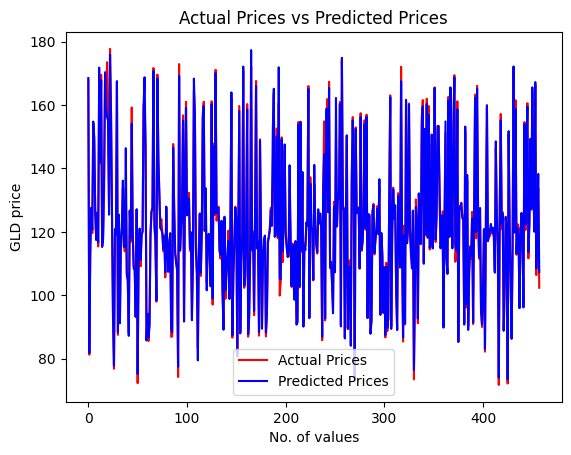

In [40]:
plt.plot(list(y_test), color='r', label='Actual Prices')
plt.plot(y_pred_test, color='b', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('No. of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()